<a href="https://colab.research.google.com/github/smokingelephants/CS898BG/blob/main/Graph_DFS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from collections import defaultdict

class Graph:

    # Constructor
    def __init__(self, vertex_list = None):

        # default dictionary to store graph
        if vertex_list is None:
            self.graph = defaultdict(list)
        else:
            self.graph = {key: list([]) for key in vertex_list}

        self.previsit_vals = defaultdict()
        self.postvisit_vals = defaultdict()
        self.counter = 1

    # function to add a directed edge to graph
    def addEdge(self, u, v):
        self.graph[u].append(v)

    #function to reverse graph
    def getTranspose(self):
        reverse_graph_obj = Graph()
        reverse_graph = {key: list([]) for key in self.graph.keys()} #defaultdict(list)
        for u in self.graph.keys():
            for v in self.graph[u]:
                reverse_graph[v].append(u)

        reverse_graph_obj.graph = reverse_graph
        return reverse_graph_obj

    # function to add a directed edge to graph
    def addDirectedEdge(self, u, v):
        self.graph[u].append(v)

    # function to add an undirected edge to graph
    def addUndirectedEdge(self, u, v):
        self.graph[u].append(v)
        self.graph[v].append(u)

    #callback function to compute before node is explored
    def previsit(self, v, visited):
        #print(v, end=' ')
        self.previsit_vals[v] = self.counter
        self.counter += 1

    #callback function to compute after node is explored
    def postvisit(self, v, visited):
        print(v, end=' ')
        self.postvisit_vals[v] = self.counter
        self.counter += 1

    # A function used by DFS
    def DFSUtil(self, v, visited):

        # Mark the current node as visited
        # and print it
        visited.add(v)

        self.previsit(v, visited)   #START

        # Recur for all the vertices
        # adjacent to this vertex
        for neighbour in self.graph[v]:
            if neighbour not in visited:
                self.DFSUtil(neighbour, visited)
            else:
                print('backward edge found', v, ":", neighbour)

        self.postvisit(v, visited)  #FINISH



    # The function to do DFS traversal. It uses
    # recursive DFSUtil()
    def DFS(self, v):

        # Create a set to store visited vertices
        visited = set()

        # Call the recursive helper function
        # to print DFS traversal
        print('Starting from ', v)
        self.DFSUtil(v, visited)

        print()

        for vertex in self.graph.keys():
            if vertex not in visited:
                self.DFSUtil(vertex, visited)

        print()






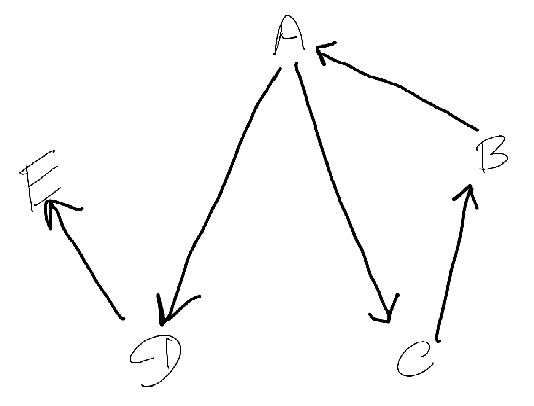

In [ ]:
 if __name__ == "__main__":
    # Driver code



    g = Graph()
    g.addEdge('B', 'A')     #self.graph['B'].append('A')
    g.addEdge('A', 'C')
    g.addEdge('C', 'B')
    g.addEdge('A', 'D')
    g.addEdge('D', 'E')


    print(g.graph)

    print("DFS trace")
    g.DFS('A')
    print()
    print('pre visit values:')
    print(g.previsit_vals)
    print('post visit values:')
    print(g.postvisit_vals)

defaultdict(<class 'list'>, {'B': ['A'], 'A': ['C', 'D'], 'C': ['B'], 'D': ['E']})
DFS trace
Starting from  A
backward edge found B : A
B C E D A 


pre visit values:
defaultdict(None, {'A': 1, 'C': 2, 'B': 3, 'D': 6, 'E': 7})
post visit values:
defaultdict(None, {'B': 4, 'C': 5, 'E': 8, 'D': 9, 'A': 10})
